In [14]:
import purplekoala.model.regression as regression
import polars as pl
import matplotlib.pyplot as plt

In [22]:
df = pl.read_csv('Hydropower.csv')
x = df[:,'BCR']
y = df[:,'AnnualProduction']
test_size = 20
x_test, x_train = x.head(test_size), x.tail(-test_size)
y_test, y_train = y.head(test_size), y.tail(-test_size)

In [29]:
model = regression.LinearRegression(learning_rate=0.01, max_epochs=1000)
model.fit(x_train.to_numpy(), y_train.to_numpy())


In [30]:
fitted_slope, fitted_intercept = model.get_parameters()
print(f"Fitted parameters: slope={fitted_slope:.4f}, intercept={fitted_intercept:.4f}")

Fitted parameters: slope=16991.1504, intercept=-5518.7427


In [31]:
# Model summary
summary = model.summary()
print(f"\nModel Summary:")
print(f"R-squared: {summary['model_fit']['r_squared']:.4f}")
print(f"RMSE: {summary['model_fit']['rmse']:.4f}")
print(f"Training epochs: {summary['training_info']['epochs_trained']}")


Model Summary:
R-squared: 0.5870
RMSE: 9424.4693
Training epochs: 1000


In [32]:
# Confidence intervals
ci_results = model.parameter_confidence_intervals(confidence_level=0.95)
print(f"\n95% Confidence Intervals:")
print(f"w_1 (slope): [{ci_results['w_1_confidence_interval'][0]:.4f}, {ci_results['w_1_confidence_interval'][1]:.4f}]")
print(f"w_0 (intercept): [{ci_results['w_0_confidence_interval'][0]:.4f}, {ci_results['w_0_confidence_interval'][1]:.4f}]")


95% Confidence Intervals:
w_1 (slope): [14825.0302, 19157.2706]
w_0 (intercept): [-7609.5680, -3427.9173]


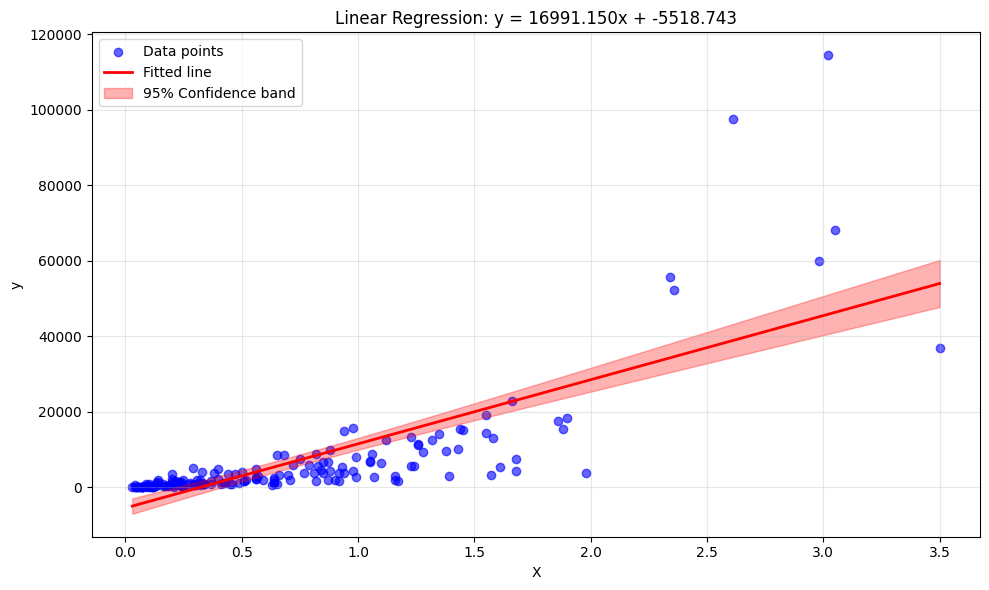

In [33]:
fig = model.plot_regression_with_confidence_band(confidence_level=0.95)
plt.show()

In [34]:
# Test different confidence levels
for conf_level in [0.90, 0.95, 0.99]:
    ci = model.parameter_confidence_intervals(confidence_level=conf_level)
    print(f"\n{int(conf_level*100)}% CI for slope: [{ci['w_1_confidence_interval'][0]:.4f}, {ci['w_1_confidence_interval'][1]:.4f}]")


90% CI for slope: [15176.3545, 18805.9463]

95% CI for slope: [14825.0302, 19157.2706]

99% CI for slope: [14132.5076, 19849.7932]
